In [115]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy.optimize import least_squares

In [155]:
"""
def skills_multiplier(resist, bonus, conv=-85):
    resist = np.array(resist)
    resist[resist<100] = resist[resist<100]+conv
    resist[resist>=100] = resist[resist>=100]+conv//5
    resist[resist>100] = 100
    resist[resist<-100] = -100
    #print(resist)
    return (1+bonus)*(100-resist)/100
"""

def pierce_multiplier(resist, bonus, pierce=35, conv=-85):
    resist = np.array(resist)
    resist[resist<100] = resist[resist<100]+conv
    resist[resist>=100] = resist[resist>=100]+conv//5
    resist[resist<100] = resist[resist<100] - pierce
    resist[resist>100] = 100
    resist[resist<-100] = -100
    #print(resist)
    return (1+bonus)*(100-resist)/100

<IPython.core.display.Javascript object>


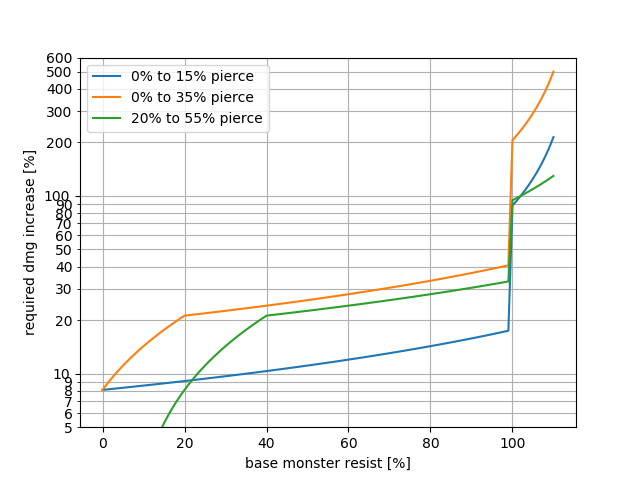

In [168]:
fig, ax = plt.subplots(1,1)
pierce0 = [0, 0, 20]
pierce1 = [15, 35, 55]
resist = np.arange(0,111,1)
for pierce in zip(pierce0, pierce1):
    res = least_squares(lambda x: pierce_multiplier(resist, x, pierce[0])-pierce_multiplier(resist, 0, pierce[1]), x0=1.5*np.ones(resist.shape))
    req_bonus = res.x
    plt.semilogy(resist, req_bonus*100)
plt.ylabel('required dmg increase [%]')
plt.xlabel('base monster resist [%]')
plt.grid(which='both')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(ScalarFormatter())
plt.ylim(5,600)
legend = []
for pierce in zip(pierce0, pierce1):
    legend.append("{}% to {}% pierce".format(pierce[0], pierce[1]))
plt.legend(legend)

<IPython.core.display.Javascript object>


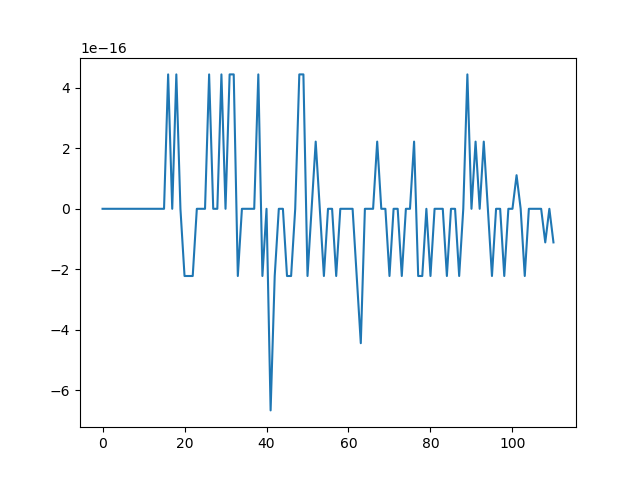

In [138]:
plt.figure()
plt.plot(res.fun)

In [139]:
print(res.x)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00502513 0.01010101
 0.01522843 0.02040816 0.02564103 0.03092784 0.03626943 0.04166667
 0.04712042 0.05263158 0.05820106 0.06382979 0.06951872 0.07526882
 0.08108108 0.08695652 0.09289617 0.0989011  0.10497238 0.11111111
 0.11731844 0.12359551 0.1299435  0.13636364 0.14285714 0.14942529
 0.15606936 0.1627907  0.16959064 0.17647059 0.18343195 0.19047619
 0.19760479 0.20481928 0.21212121 0.21341463 0.21472393 0.21604938
 0.2173913  0.21875    0.22012579 0.22151899 0.22292994 0.22435897
 0.22580645 0.22727273 0.22875817 0.23026316 0.23178808 0.23333333
 0.23489933 0.23648649 0.23809524 0.23972603 0.24137931 0.24305556
 0.24475524 0.24647887 0.24822695 0.25       0.25179856 0.25362319
 0.25547445 0.25735294 0.25925926 0.26119403 0.26315789 0.26515152
 0.26717557 0.26923077 0.27131783 0.2734375  0.27559055 0.27777778
 0.28      

In [141]:
pierce_multiplier(np.array([0]), 0, 30)
pierce_multiplier(np.array([0]), 0, 65)

array([2.])